In [23]:
#imports
import numpy as np
import pandas as pd
import spacy

In [32]:
dataframe_letras = pd.read_csv('letras.csv', header = 0, names = ['Titulo', 'Letra', 'Artista'])
dataframe_letras

,Titulo,Letra,Artista
0,A Louca Chegou,"A louca chegou o ô, a louca chegou Desesperada...",adoniran-barbosa
1,A Luz da Light,Lá no morro quando a luz da light pífa A gente...,adoniran-barbosa
2,Abrigo de Vagabundos,Eu arranjei o meu dinheiro Trabalhando o ano i...,adoniran-barbosa
3,Acende O Candieiro,"Falado: ""Vai nêga, fala que o pai mandou, viu...",adoniran-barbosa
4,"Adeus, Escola",Enganado eu vou partir Neste mundo jamais vive...,adoniran-barbosa
...,...,...,...
320,Vou Botar Teu Nome Na Macumba,Eu vou botar teu nome na macumba Vou procurar ...,zeca-pagodinho
321,Vou Procurar Esquecer,Vou procurar um novo amor na minha vida Porque...,zeca-pagodinho
322,Vou Ver Juliana,Quando a mare vazá Vou vê juliana Vou vê julia...,zeca-pagodinho
323,Yaô Cadê A Samba / Outro Recado / Hino,"Ô Yaô Yaô, cadê a samba? Está mangando na curi...",zeca-pagodinho


In [33]:
# tokenizacao - removendo stop words
nlp = spacy.load('pt_core_news_lg')

dataframe_letras['letras_tokens'] = [nlp(cancao) for cancao in dataframe_letras.Letra]
dataframe_letras.sample(3)

,Titulo,Letra,Artista,letras_tokens
58,Barafunda,"Era Aurora, não, era Aurelia Ou era Ariela, nã...",chico-buarque,"(Era, Aurora, ,, não, ,, era, Aurelia, Ou, era..."
151,Poema do Desencontro,Foi uma pena amor Tudo acabar assim Eu a chora...,clara-nunes,"(Foi, uma, pena, amor, Tudo, acabar, assim, Eu..."
53,Derramando Lágrimas,Já viéste derramando lágrimas Jurei não mais t...,clara-nunes,"(Já, viéste, derramando, lágrimas, Jurei, não,..."


In [51]:
# lemmatizacao
stop_words = nlp.Defaults.stop_words
FIRST_TEN = 10
palavras_lemmatizadas = []
for doc in dataframe_letras['letras_tokens']:
    for token in doc:
        if token.text not in stop_words and token.pos_ in ['NOUN', 'VERB']:
            palavras_lemmatizadas.append(token.lemma_.lower())
palavras_lemmatizadas = list(set(palavras_lemmatizadas))
print(f'Foram lemmatizadas {len(palavras_lemmatizadas)} palavras.')
print(palavras_lemmatizadas[:FIRST_TEN])

Foram lemmatizadas 27715 palavras.
['confisco', 'manué', 'lua-de-mel', 'ferrão', 'sumiço', 'misturada', 'gula', 'turquia', 'tende', 'mídia']


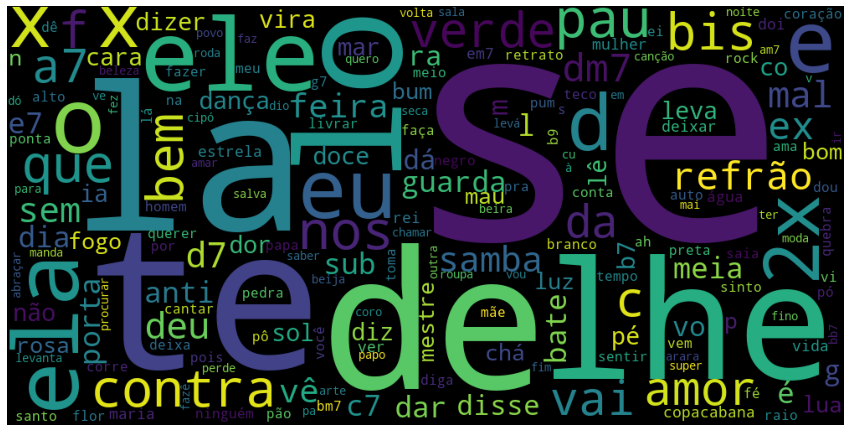

In [52]:
# gerando wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
unique_string = (' ').join(palavras_lemmatizadas)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('wordcloud'+'.png', bbox_inches='tight')
plt.show()
plt.close()

In [104]:
import gensim
from gensim.models import KeyedVectors
from gensim.models import Word2Vec

lista_lista_tokens = [[letras] for letras in palavras_lemmatizadas]
modelo_skipgram = Word2Vec(window = 5, sg = 1, min_count = 1, alpha = 0.03, min_alpha = 0.007)
modelo_skipgram.build_vocab(lista_lista_tokens, progress_per=5000)

modelo_skipgram.train(lista_lista_tokens, 
                     total_examples = modelo_skipgram.corpus_count,
                     epochs = 30)

(831450, 831450)

In [105]:
modelo_skipgram.wv.most_similar('tristeza')

[('contam', 0.41869473457336426),
 ('pensi', 0.3814131021499634),
 ('prá', 0.36984309554100037),
 ('calmo', 0.36924824118614197),
 ('pós-graduada', 0.3439372777938843),
 ('deslavar', 0.34241175651550293),
 ('progridir', 0.3384232819080353),
 ('disfarcer', 0.3374692499637604),
 ('hipnotizar', 0.3345906734466553),
 ('optar', 0.33264240622520447)]